# Juan Carlos Perez Ramirez
## Procesamiento de Lenguaje Natural
## Practica 3: Bolsas de terminos y esquemas de pesado

In [1]:
import os
import re
from keras.preprocessing.text import Tokenizer

def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []

    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_txt += [tweet]
        for label in f_truth:
            tr_y += [label]
    return tr_txt, tr_y

2025-02-01 14:48:27.815079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-01 14:48:28.152000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-01 14:48:28.153932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-01 14:48:29.404930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tr_txt, tr_y = get_texts_from_file("mex20_train.txt", "mex20_train_labels.txt")

In [3]:
tr_txt

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n',
 'Estoy muy encabronada con las pseudo feministas por tontas e iletradas, a veces me avergüenza ser mujer; preferiría tener un falo. #NiUnaMas\n',
 'Anden putos, recuerdan el #noerapenal #Holanda fuera de #Rusia2018, esto se llama #karma ehhhhhhhh #puuuuuutos\n',
 'Si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas.\n',
 'Ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos.\n',
 '@USUARIO @USUARIO @USUARIO @USUARIO Es solo un HDP aprovechado y que su "Diosito Bimbo" me perdone\n',
 

# Estadisticas simples

Counter({'0\n': 3759, '1\n': 1519})


Text(0.5, 0, 'Class')

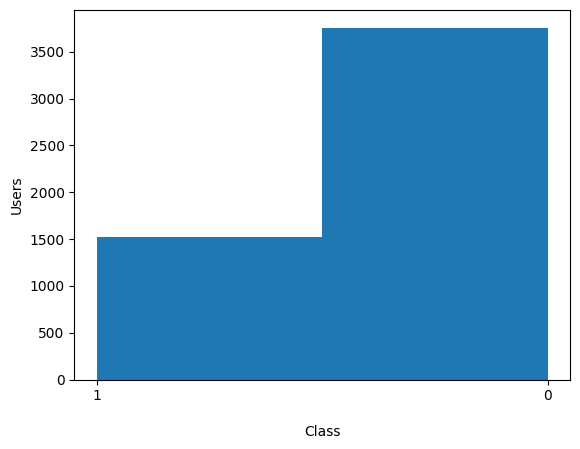

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))

plt.ylabel("Users")
plt.xlabel("Class")

# Un ojo a los datos

In [4]:
tr_txt[:10]

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n',
 'Estoy muy encabronada con las pseudo feministas por tontas e iletradas, a veces me avergüenza ser mujer; preferiría tener un falo. #NiUnaMas\n',
 'Anden putos, recuerdan el #noerapenal #Holanda fuera de #Rusia2018, esto se llama #karma ehhhhhhhh #puuuuuutos\n',
 'Si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas.\n',
 'Ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos.\n',
 '@USUARIO @USUARIO @USUARIO @USUARIO Es solo un HDP aprovechado y que su "Diosito Bimbo" me perdone\n']

# Construccion Simple del Vocabulario

In [5]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [6]:
import nltk 
# cuenta la frecuencia de aparicion de palabras y las almacena en un diccionario
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [7]:
fdist

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

In [8]:
len(fdist)

15194

In [9]:
# Ordena el diccionario de mayor a menor frecuencia
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [10]:
V = sortFreqDict(fdist)

In [11]:
V = V[:5000] # Tomamos las 5000 palabras mas frecuentes para simplificar el vocabulario a analizar

In [12]:
# se guarda en un diccionario debido a su rapido acceso
dict_indices = dict()
cont = 0

for weight, word in V:
    dict_indices[word] = cont
    cont += 1

# Bolsa de palabras

In [13]:
import numpy as np

# Construccion de la matriz de BOW, donde cada fila es un documento y cada columna una palabra donde se indica si esta presente o no
def build_bow_tr(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt), len(V)),dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc:
            if word in dict_indices: # en caso de que la palabra no este en el diccionario recortado
                BOW[cont_doc, dict_indices[word]] = 1
        cont_doc += 1
    return BOW

In [14]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)

In [15]:
BOW_tr.shape

(5278, 5000)

Counter({0: 418, 1: 169})


Text(0.5, 0, 'Class')

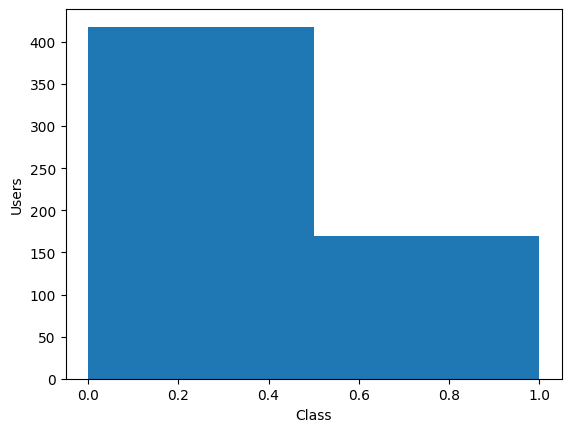

In [16]:
val_txt, val_y = get_texts_from_file("mex20_val.txt", "mex20_val_labels.txt")
val_y = list(map(int, val_y))

from collections import Counter
import matplotlib.pyplot as plt

print(Counter(val_y))
plt.hist(val_y, bins=len(set(val_y)))
plt.ylabel("Users")
plt.xlabel("Class")

In [17]:
BOW_val = build_bow_tr(val_txt, V, dict_indices)

# Clasificacion

In [21]:
tr_y = list(map(int, tr_y))

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring='f1_macro', cv=5)

grid.fit(BOW_tr, tr_y)

y_pred = grid.predict(BOW_val)

p, r, f = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=1)[:3]

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juancho/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

[[356  62]
 [ 49 120]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       418
           1       0.66      0.71      0.68       169

    accuracy                           0.81       587
   macro avg       0.77      0.78      0.77       587
weighted avg       0.82      0.81      0.81       587



In [23]:
incorrect = []
for e in zip(val_y, y_pred, range(len(val_y))):
    if e[0] != e[1]:
        incorrect += [e[2]]

In [24]:
for e in incorrect:
    case = e
    if "madre" in val_txt[case].strip():
        print("Texto: ", val_txt[case].strip())
        print("Truth: ", val_y[case])
        print("Predicted: ", y_pred[case])

Texto:  Al perro que se te acerque le parto su madre a si de facil
Truth:  1
Predicted:  0
Texto:  @USUARIO Ya m tienen hasta la madre esos maes
Truth:  0
Predicted:  1
Texto:  Amigos, Vero tiene toda la razón por eso no hay que ir a esa madre, mejor todos a Costeño a empedar.
Truth:  0
Predicted:  1
Texto:  Pero un día te voy a tapar el culo mientras te estoy lamiendo la pantunfla a ver si te da una embolia, hija de tu puta madre
Truth:  1
Predicted:  0
Texto:  @USUARIO PA tener 80 estas a toda madre!
Truth:  0
Predicted:  1
Texto:  Por está madre me agarré a vergazos con el de la combi y no le pagué, el puto decía que ya no valen.
Truth:  1
Predicted:  0
Texto:  Ya van a ser las putas 8 y la pasarela no tiene para cuando empezar perra madre
Truth:  0
Predicted:  1
Texto:  Políticos pseudoaficiomados que sólo en finales hablan de beisbol pueden ir mucho a chingar a su madre. Y peor cuando opinan.
Truth:  1
Predicted:  0
Texto:  @USUARIO @USUARIO Hija de tu madre 😂😂😂😂🖕🏼🖕🏼🤚🏻
Truth:  0
P